In [82]:
import pandas as pd
import itertools
from scipy import stats

# 1. Measures With Central Tedencies 
- Mode
- Mean
- Median

In [41]:
df = pd.read_csv("covid_19_indonesia_time_series_all.csv")

In [42]:
df

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths,Name,Item,Kind,Hidden
0,1/8/2020,ID-JI,Jawa Timur,9,3,1,5,9,5,10,...,0.07,0.12,55.56%,111.11%,NaN,NaN,NaN,NaN,NaN,NaN
1,1/9/2020,ID-JI,Jawa Timur,0,1,23,-24,9,6,33,...,0.02,0.15,66.67%,366.67%,0.00,0.33,NaN,NaN,NaN,NaN
2,1/10/2020,ID-JI,Jawa Timur,0,1,14,-15,9,7,47,...,0.02,0.17,77.78%,522.22%,1.00,1.00,NaN,NaN,NaN,NaN
3,1/11/2020,ID-JI,Jawa Timur,0,3,8,-11,9,10,55,...,0.07,0.25,111.11%,611.11%,1.00,3.00,NaN,NaN,NaN,NaN
4,1/12/2020,ID-JI,Jawa Timur,0,3,1,-4,9,13,56,...,0.07,0.32,144.44%,622.22%,1.00,1.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16278,7/9/2021,ID-SG,Sulawesi Tenggara,124,1,3,120,12447,252,10412,...,0.38,95.62,2.02%,83.65%,0.92,0.50,NaN,NaN,NaN,NaN
16279,7/9/2021,ID-SA,Sulawesi Utara,278,9,9,260,17424,572,15525,...,3.41,216.51,3.28%,89.10%,1.24,9.00,NaN,NaN,NaN,NaN
16280,7/9/2021,ID-SB,Sumatera Barat,718,10,275,433,55675,1259,48840,...,1.81,228.11,2.26%,87.72%,0.93,1.00,NaN,NaN,NaN,NaN
16281,7/9/2021,ID-SS,Sumatera Selatan,341,6,221,114,31147,1569,27088,...,0.73,190.93,5.04%,86.97%,1.15,0.38,NaN,NaN,NaN,NaN


In [20]:
df.describe()

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,City or Regency,Total Regencies,...,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Growth Factor of New Cases,Growth Factor of New Deaths,Name,Item,Kind,Hidden
count,16283.000000,16283.000000,16283.000000,16283.000000,1.628300e+04,16283.000000,1.628300e+04,16283.000000,0.0,16283.000000,...,16283.000000,16283.000000,16283.000000,16283.000000,15298.000000,14344.000000,0.0,0.0,0.0,0.0
mean,301.271879,7.919364,248.015783,45.336732,4.274674e+04,1243.917644,3.689427e+04,4608.549714,NaN,24.792913,...,20.673622,2977.160052,0.463346,72.462398,1.437652,1.084872,NaN,NaN,NaN,NaN
std,1330.028199,32.171434,997.784905,550.203700,1.784936e+05,4944.634529,1.580017e+05,17670.075450,NaN,69.658831,...,45.319811,4987.373956,1.096785,99.203343,3.388187,1.949005,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,-8381.000000,1.000000e+00,0.000000,0.000000e+00,-2395.000000,NaN,1.000000,...,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,6.000000,0.000000,2.000000,-7.000000,7.265000e+02,23.000000,3.860000e+02,162.500000,NaN,8.000000,...,1.645000,166.695000,0.000000,4.980000,0.640000,0.670000,NaN,NaN,NaN,NaN
50%,39.000000,1.000000,24.000000,2.000000,5.941000e+03,149.000000,4.484000e+03,851.000000,NaN,12.000000,...,7.670000,1398.640000,0.110000,41.380000,1.000000,1.000000,NaN,NaN,NaN,NaN
75%,127.000000,4.000000,106.000000,32.000000,1.777450e+04,556.000000,1.430450e+04,2271.000000,NaN,18.000000,...,21.870000,3817.535000,0.550000,93.520000,1.330000,1.000000,NaN,NaN,NaN,NaN
max,38391.000000,1040.000000,28975.000000,18504.000000,2.455912e+06,64631.000000,2.023548e+06,367733.000000,NaN,416.000000,...,1208.910000,58673.660000,63.800000,854.680000,175.000000,134.500000,NaN,NaN,NaN,NaN


In [5]:
df.median()

New Cases                      3.900000e+01
New Deaths                     1.000000e+00
New Recovered                  2.400000e+01
New Active Cases               2.000000e+00
Total Cases                    5.941000e+03
Total Deaths                   1.490000e+02
Total Recovered                4.484000e+03
Total Active Cases             8.510000e+02
City or Regency                         NaN
Total Regencies                1.200000e+01
Total Cities                   2.000000e+00
Total Districts                1.710000e+02
Total Urban Villages           1.750000e+02
Total Rural Villages           1.591000e+03
Area (km2)                     4.671700e+04
Population                     4.340348e+06
Population Density             1.038400e+02
Longitude                      1.127329e+02
Latitude                      -2.993595e+00
New Cases per Million          7.670000e+00
Total Cases per Million        1.398640e+03
New Deaths per Million         1.100000e-01
Total Deaths per Million       4

In [18]:
df.mean()

New Cases                      3.012719e+02
New Deaths                     7.919364e+00
New Recovered                  2.480158e+02
New Active Cases               4.533673e+01
Total Cases                    4.274674e+04
Total Deaths                   1.243918e+03
Total Recovered                3.689427e+04
Total Active Cases             4.608550e+03
City or Regency                         NaN
Total Regencies                2.479291e+01
Total Cities                   6.049576e+00
Total Districts                4.325953e+02
Total Urban Villages           5.244581e+02
Total Rural Villages           4.631860e+03
Area (km2)                     1.140775e+05
Population                     1.605704e+07
Population Density             7.683087e+02
Longitude                      1.134275e+02
Latitude                      -2.850093e+00
New Cases per Million          2.067362e+01
Total Cases per Million        2.977160e+03
New Deaths per Million         4.633464e-01
Total Deaths per Million       7

In [58]:
df["New Cases"].mode()
df["New Deaths"].mode()
df["New Recovered"].mode()
df["New Active Cases"].mode()
df["Total Cases"].mode()
df["Total Deaths"].mode()
df["Total Recovered"].mode()
df["Total Active Cases"].mode()
df["Total Regencies"].mode()
df["Total Cities"].mode()
df["Total Districts"].mode()
df["Total Urban Villages"].mode()
df["Total Rural Villages"].mode()
df["Population Density"].mode()

0    846.78
dtype: float64

In [52]:
df["New Recovered"].mode()

0    0
dtype: int64

In [53]:
df["New Active Cases"].mode()

0    0
dtype: int64

In [55]:
df["Total Cases"].mode()

0    1
dtype: int64

In [56]:
df["Total Deaths"].mode()

0    2
dtype: int64

In [57]:
df["Total Recovered"].mode()

0    0
dtype: int64

In [76]:
df["New Cases"].mode()

0    0
dtype: int64

# 2. Measures with Variances
- Range
- Percentiles
- Quartiles 
- Outliers
- Variance and Standart Deviation
- Standart Deviation in Normal Distribution
- Z Score 

In [80]:
#Range
rangecol = ["New Cases", "New Deaths", "New Recovered", "New Active Cases"]
for col in rangecol:
    print(df[col].name + " Range " + str(df[col].max() - df[col].min()))

New Cases Range 38391
New Deaths Range 1040
New Recovered Range 28975
New Active Cases Range 26885


In [84]:
#Pencentiles
print(stats.percentileofscore(df['Total Regencies'], 8, 'strict'))
print(stats.percentileofscore(df['Total Regencies'], 8, 'weak'))
print(stats.percentileofscore(df['Total Regencies'], 8, 'rank'))

23.5460296014248
32.303629552293806
27.9279002640791


In [90]:
#Quartiles
print(df['Total Regencies'].quantile([0.25, 0.5, 0.75]))

0.25     8.0
0.50    12.0
0.75    18.0
Name: Total Regencies, dtype: float64


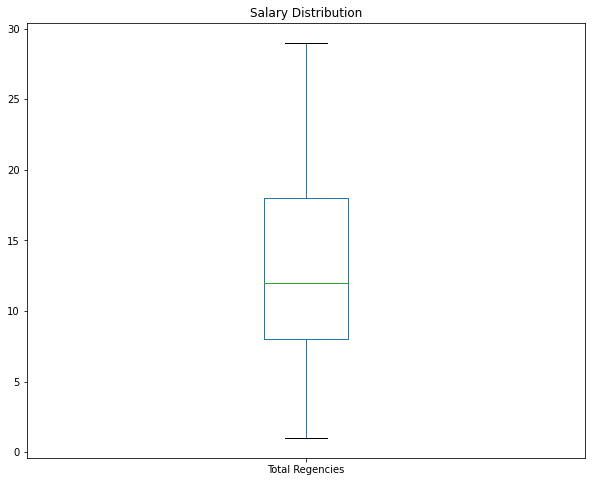

In [119]:
#Outliers
df['Total Regencies'].plot(kind='box', title='Salary Distribution', figsize=(10,8), showfliers=False)
plt.show()

In [94]:
#Variance
print(df['Total Regencies'].var())

4852.352763919315


In [95]:
#Standart Deviation
print(df['Total Regencies'].std())

69.6588311983435


In [97]:
#Z Score
Zscore =(df['Total Regencies'] - df['Total Regencies'].mean()) / df['Total Regencies'].std()

In [98]:
Zscore

0        0.060396
1        0.060396
2        0.060396
3        0.060396
4        0.060396
           ...   
16278   -0.140584
16279   -0.198007
16280   -0.183651
16281   -0.169295
16282    0.002973
Name: Total Regencies, Length: 16283, dtype: float64

In [118]:
mines = []
maka = []
for zero in Zscore:
    if zero > 0:
        maka.append(zero)
    elif zero < 0:
        mines.append(zero)
print("Total yang lebih dari mean: " + str(len(maka)))  
print("Total yang tidak lebih dari mean: " + str(len(mines)))

Total yang lebih dari mean: 2488
Total yang tidak lebih dari mean: 13795
